In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
from pathlib import Path
import random
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [57]:
file = Path("./Fish_Dataset")  # dataset location path
File_Path = list(file.glob(r"**/*.png"))
Labels = list([os.path.split(os.path.split(x)[0])[1] for x in File_Path])

In [58]:
File_Path = pd.Series(File_Path).astype(str)
Labels = pd.Series(Labels)
fish_data = pd.concat([File_Path, Labels], axis=1)
fish_data.columns = ['Image_Path', 'Class']

In [59]:
# Drop all the images that ends with (GT)
fish_data = fish_data[fish_data["Class"].apply(
    lambda x: x[-2:] != "GT")].reset_index(drop=True)

fish_data.head()  # get first 5 rows of the dataset

,Image_Path,Class
0,Fish_Dataset/Sea Bass/00481.png,Sea Bass
1,Fish_Dataset/Sea Bass/00495.png,Sea Bass
2,Fish_Dataset/Sea Bass/00324.png,Sea Bass
3,Fish_Dataset/Sea Bass/00442.png,Sea Bass
4,Fish_Dataset/Sea Bass/00456.png,Sea Bass


In [60]:
fish_data.shape

(9000, 2)

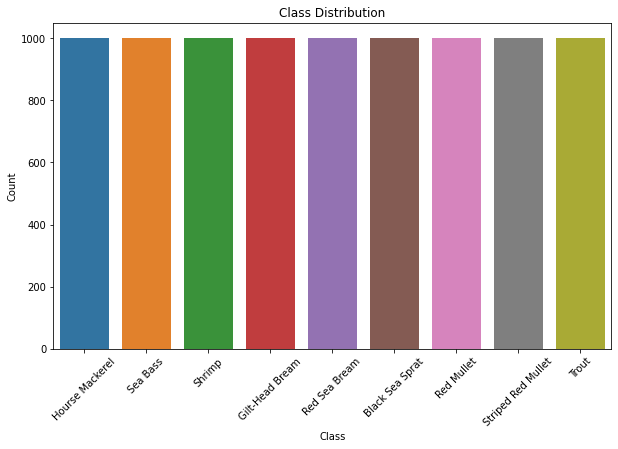

In [61]:
# 1. Bar Plot: Class Distribution
class_counts = fish_data['Class'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

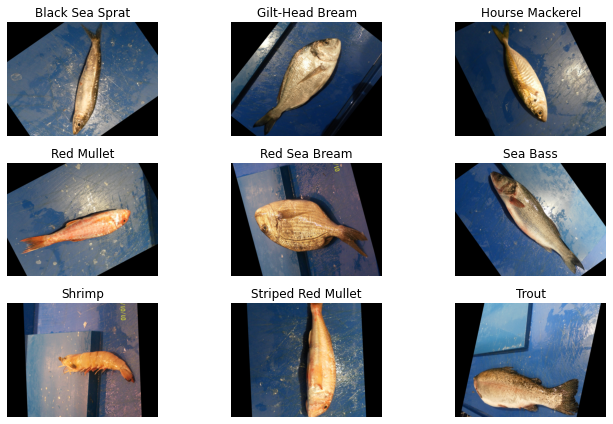

In [64]:
# 2. Sample Images
sample_images_dir = './'
# Assumes 'Image_Path' column contains image file paths
sample_images = fish_data.groupby('Class').first()['Image_Path']
plt.figure(figsize=(10, 6))
for i, class_name in enumerate(sample_images.index):
    image_path = os.path.join(sample_images_dir, sample_images[class_name])
    image = Image.open(image_path)
    plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(class_name)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [65]:
subclasses = list(fish_data['Class'].unique())

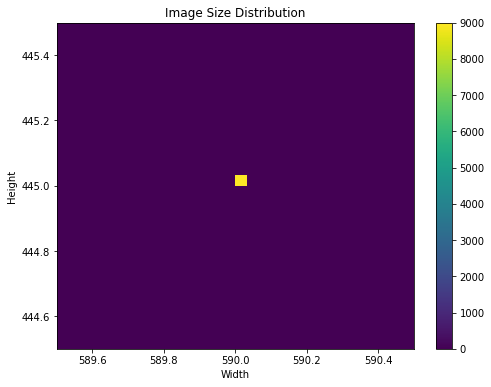

In [70]:
# 3. Image Size Distribution
image_sizes = []
for subclass in subclasses:
    subclass_directory = os.path.join(images_directory, subclass)
    for image_file in os.listdir(subclass_directory):
        if image_file == ".DS_Store":
            continue
        image_path = os.path.join(subclass_directory, image_file)
        image = plt.imread(image_path)
        image_sizes.append(image.shape[:2])
# Swap width and height for consistency
image_sizes = [(size[1], size[0]) for size in image_sizes]

plt.figure(figsize=(8, 6))
plt.hist2d([size[0] for size in image_sizes],
           [size[1] for size in image_sizes],
           bins=30,
           cmap='viridis')
plt.colorbar()
plt.title('Image Size Distribution')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

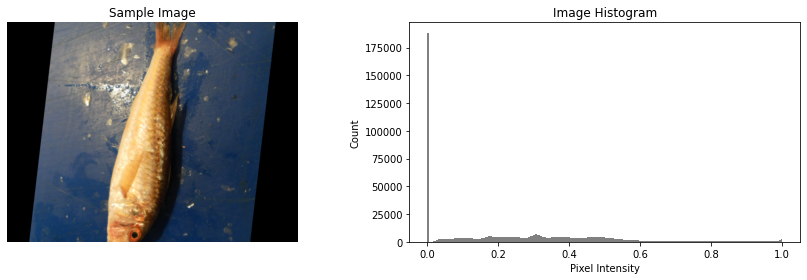

In [73]:
# 4. Sample Image and Its Histogram
sample_image = random.choice(os.listdir(images_directory))
image_path = random.choice(
    os.listdir(os.path.join(images_directory, sample_image)))
image = plt.imread(os.path.join(images_directory, sample_image, image_path))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Sample Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(image.flatten(), bins=256, color='gray')
plt.title('Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

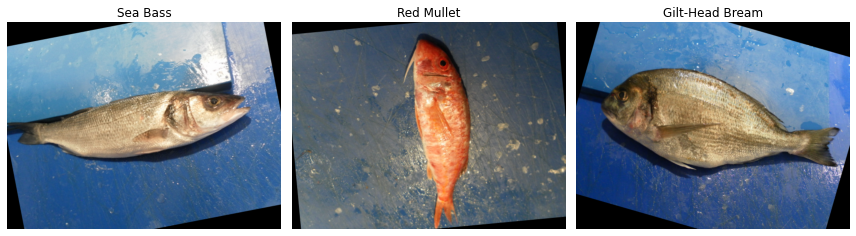

In [74]:
# 5. Image Grid of Multiple Subclasses
plt.figure(figsize=(12, 12))
for i, subclass in enumerate(subclasses[:3]):
    subclass_directory = os.path.join(images_directory, subclass)
    plt.subplot(3, 3, i + 1)
    for j in range(9):
        image_path = os.path.join(subclass_directory,
                                  os.listdir(subclass_directory)[j])
        image = plt.imread(image_path)
        plt.imshow(image)
        plt.axis('off')
    plt.title(subclass)
plt.tight_layout()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


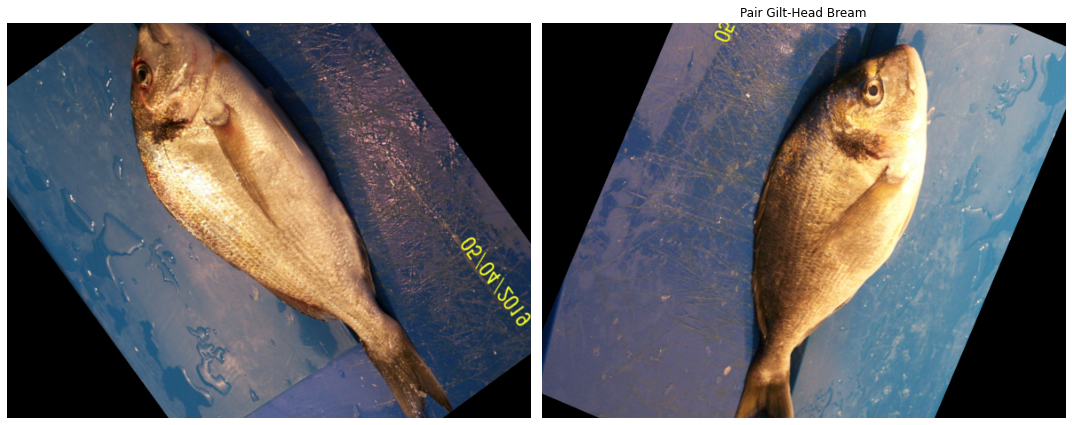

In [75]:
# 6. Pairwise Image Comparison
plt.figure(figsize=(15, 15))
for i, subclass in enumerate(subclasses[:3]):
    subclass_directory = os.path.join(images_directory, subclass)
    plt.subplot(3, 3, i + 1)
    random_images = random.sample(os.listdir(subclass_directory), 2)
    for j in range(2):
        image_path = os.path.join(subclass_directory, random_images[j])
        image = plt.imread(image_path)
        plt.subplot(1, 2, j + 1)
        plt.imshow(image)
        plt.axis('off')
    plt.title(f'Pair {subclass}')
plt.tight_layout()
plt.show()

In [77]:
fish_data.head()

,Image_Path,Class
0,Fish_Dataset/Sea Bass/00481.png,Sea Bass
1,Fish_Dataset/Sea Bass/00495.png,Sea Bass
2,Fish_Dataset/Sea Bass/00324.png,Sea Bass
3,Fish_Dataset/Sea Bass/00442.png,Sea Bass
4,Fish_Dataset/Sea Bass/00456.png,Sea Bass


In [79]:
# Prepare the feature matrix (X) and target variable (y)
X = []
y = fish_data['Class'].values

for image_path in fish_data['Image_Path']:
    path = os.path.join(image_path)
    image = Image.open(path)
    image = image.resize((64, 64))  # Resize the images for consistency
    image_array = np.array(image)
    X.append(image_array.reshape(-1))

In [80]:
X = np.array(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [81]:
# dimensions of dataset
X_train.shape, X_test.shape

((7200, 12288), (1800, 12288))

In [82]:
# SVM Classifier
svm_model = SVC(kernel='rbf', C=10, gamma='scale')
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_confusion_matrix = confusion_matrix(y_test, svm_predictions)

In [83]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)

In [84]:
# K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_confusion_matrix = confusion_matrix(y_test, knn_predictions)

In [85]:
# Visualize the results
labels = fish_data['Class'].unique()

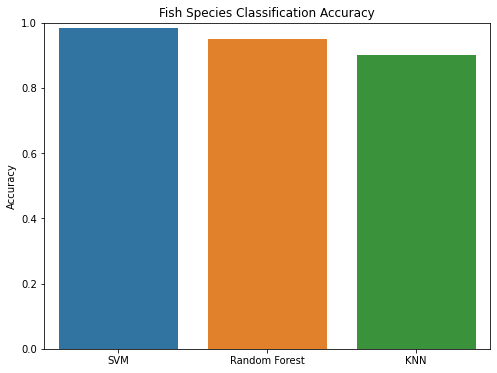

In [86]:
# Accuracy comparison
accuracy_data = {
    'Algorithm': ['SVM', 'Random Forest', 'KNN'],
    'Accuracy': [svm_accuracy, rf_accuracy, knn_accuracy]
}
plt.figure(figsize=(8, 6))
sns.barplot(x='Algorithm', y='Accuracy', data=accuracy_data)
plt.title('Fish Species Classification Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

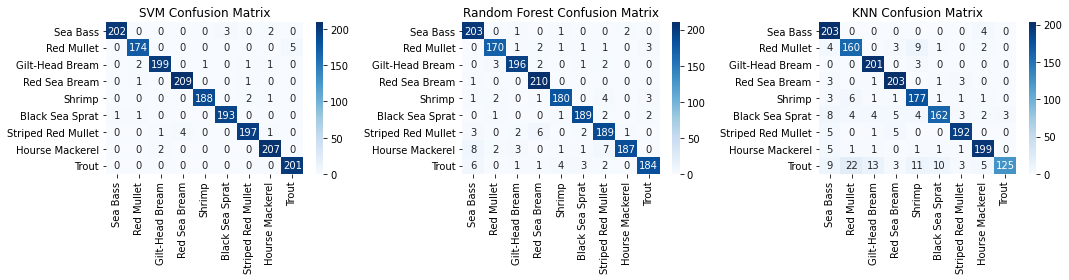

In [87]:
# Confusion matrix comparison
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
sns.heatmap(svm_confusion_matrix,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=labels,
            yticklabels=labels)
plt.title('SVM Confusion Matrix')

plt.subplot(1, 3, 2)
sns.heatmap(rf_confusion_matrix,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=labels,
            yticklabels=labels)
plt.title('Random Forest Confusion Matrix')

plt.subplot(1, 3, 3)
sns.heatmap(knn_confusion_matrix,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=labels,
            yticklabels=labels)
plt.title('KNN Confusion Matrix')

plt.tight_layout()
plt.show()

In [89]:
# Select a random test image
random_image_path = random.choice(fish_data['Image_Path'])
random_image = Image.open(os.path.join(random_image_path))

# Resize the image for consistency
random_image = random_image.resize((64, 64))
random_image_array = np.array(random_image).reshape(1, -1)

In [90]:
# Predict the label using each model
svm_prediction = svm_model.predict(random_image_array)[0]
rf_prediction = rf_model.predict(random_image_array)[0]
knn_prediction = knn_model.predict(random_image_array)[0]

In [92]:
# Print the predicted labels
print("Random Test Image: ", random_image_path)
print("SVM Prediction: ", svm_prediction)
print("Random Forest Prediction: ", rf_prediction)
print("KNN Prediction: ", knn_prediction)

Random Test Image:  Fish_Dataset/Gilt-Head Bream/00302.png
SVM Prediction:  Gilt-Head Bream
Random Forest Prediction:  Gilt-Head Bream
KNN Prediction:  Gilt-Head Bream


In [94]:
accuracy_data

{'Algorithm': ['SVM', 'Random Forest', 'KNN'],
 'Accuracy': [0.9833333333333333, 0.9488888888888889, 0.9011111111111111]}